In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numdifftools as nd
from scipy import integrate
import pandas as pd

def f_3a(x: float) -> float:
    return 1 / (1 + x**2)

def f_3a_2_d() -> nd.Derivative:
    return nd.Derivative(f_3a, n=2)

def f_3a_4_d() -> nd.Derivative:
    return nd.Derivative(f_3a, n=4)

def f_3b(x: float) -> nd.Derivative:
    return x ** (1/3) * np.exp(np.sin(x))

def f_3b_2_d() -> nd.Derivative:
    return nd.Derivative(f_3a, n=2)

def f_3b_4_d() -> nd.Derivative:
    return nd.Derivative(f_3b, n=4)

In [3]:
def simpson_3a(devide_num: int, f: callable) -> float:
    distance: np.ndarray = np.linspace(-1.0, 1.0, devide_num)
    sum: float = 0.0
    step: float = distance[1] - distance[0]
    for i, N in enumerate(distance):
        if N != 1.0:
            sum += step/6 * (f(N) + 4*f(N+step/2) + f(N+step))
    return sum

def trapese_3a(devide_num: int, f: callable) -> float:
    distance: np.ndarray = np.linspace(-1.0, 1.0, devide_num)
    sum: float = 0.0
    step: float = distance[1] - distance[0]
    for i, N in enumerate(distance):
        if N != 1.0:
            sum += step/2 * (f(N) + f(N+step))
    return sum

def simpson_3b(devide_num: int, f: callable) -> float:
    distance: np.ndarray = np.linspace(0.0, 1.0, devide_num)
    sum: float = 0.0
    step: float = distance[1] - distance[0]
    for i, N in enumerate(distance):
        if N != 1.0:
            sum += step/6 * (f(N) + 4*f(N+step/2) + f(N+step))
    return sum

def trapese_3b(devide_num: int, f: callable) -> float:
    distance: np.ndarray = np.linspace(0.0, 1.0, devide_num)
    sum: float = 0.0
    step: float = distance[1] - distance[0]
    for i, N in enumerate(distance):
        if N != 1.0:
            sum += step/2 * (f(N) + f(N+step))
    return sum

In [4]:
def plot_err(x: list[list], y: list[list]) -> None:
    x[0] = [abs(x[0][i]) for i in range(len(x[0]))]
    x[1] = [abs(x[1][i]) for i in range(len(x[1]))]
    y[0] = [abs(y[0][i]) for i in range(len(y[0]))]
    y[1] = [abs(y[1][i]) for i in range(len(y[1]))]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylim((2**(-30), 2**(-1)))
    plt.xlim((2**0, 2**10))
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    plt.grid(True)
    marker_list: list[str] = ['*', 'o']
    line_1: plt.PathCollection = ax.scatter(x[0], y[0], marker=marker_list[0])
    line_2: plt.PathCollection = ax.scatter(x[1], y[1], marker=marker_list[1])
    ax.legend([line_1, line_2], ['Метод трапеций - 1/N**2', 'Метод Симпсона - 1/N**4'])
    plt.show()

In [5]:
exp_result_trap_3a: tuple = [trapese_3a(2**num, f_3a) for num in range(1, 11)]
exp_result_simp_3a: tuple = [simpson_3a(2**num, f_3a) for num in range(1, 11)]
exp_result_trap_3b: tuple = [trapese_3b(2**num, f_3b) for num in range(1, 11)]
exp_result_simp_3b: tuple = [simpson_3b(2**num, f_3b) for num in range(1, 11)]

In [6]:
x_trap_3a = np.linspace(-1.0, 1.0, 1024)
x_simp_3a = np.linspace(-1.0, 1.0, 1024)

theor_result_trap_3a: float = integrate.trapezoid(f_3a(x_trap_3a), x_trap_3a)
theor_result_simp_3a: float = integrate.simpson(f_3a(x_simp_3a), x_simp_3a)

error_trap_3a: list = [theor_result_trap_3a - exp_result_trap_3a[i] for i in range(len(exp_result_trap_3a))]
error_simp_3a: list = [theor_result_simp_3a - exp_result_simp_3a[i] for i in range(len(exp_result_trap_3a))]

In [7]:
x_trap_3b = np.linspace(0.0, 1.0, 1024)
x_simp_3b = np.linspace(0.0, 1.0, 1024)

theor_result_trap_3b: float = integrate.trapezoid(f_3b(x_trap_3b), x_trap_3b)
theor_result_simp_3b: float = integrate.simpson(f_3b(x_simp_3b), x_simp_3b)

error_trap_3b: list = [theor_result_trap_3b - exp_result_trap_3b[i] for i in range(len(exp_result_trap_3b))]
error_simp_3b: list = [theor_result_simp_3b - exp_result_simp_3b[i] for i in range(len(exp_result_simp_3b))]

In [8]:
x_err_3a: list[float] = [2**x for x in range(1, 11)]
x_err_3b: list[float] = [2**x for x in range(1, 11)]

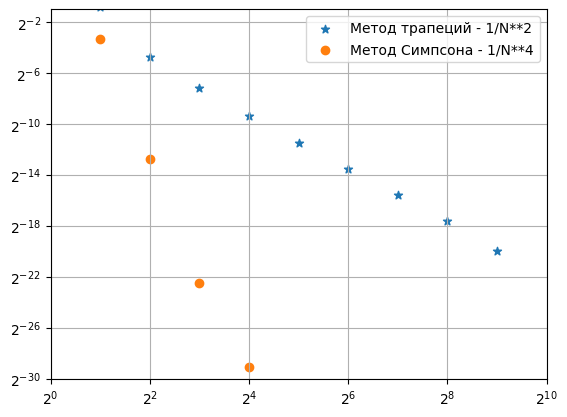

In [12]:
plot_err([x_err_3b, x_err_3b], [error_trap_3a, error_simp_3a])

In [10]:
df = pd.DataFrame({'Разбиения' : x_err_3a, 'Теор. Трапеция 3а' : theor_result_trap_3a, 'Эксп. Трапеция 3а' : exp_result_trap_3a,
                 'Ошибка 3а Трапеция' : error_trap_3a, "Теор. Симпсмон 3а" : theor_result_simp_3a, 'Эксп. Симпсон 3а' : exp_result_simp_3a,
                 'Ошибка Симпсон 3а' : error_simp_3a, "Теор. Трапеция 3b" : theor_result_trap_3b, 'Эксп. Трапеция 3b' : exp_result_trap_3b,
                'Ошибка Трапеция 3b' : error_trap_3b, "Теор. Симпсон 3b" : theor_result_simp_3b, 'Эксп Симпсон 3b' : exp_result_simp_3b,
                'Ошибка Симпсон 3b' : error_simp_3b})

df

,Разбиения,Теор. Трапеция 3а,Эксп. Трапеция 3а,Ошибка 3а Трапеция,Теор. Симпсмон 3а,Эксп. Симпсон 3а,Ошибка Симпсон 3а,Теор. Трапеция 3b,Эксп. Трапеция 3b,Ошибка Трапеция 3b,Теор. Симпсон 3b,Эксп Симпсон 3b,Ошибка Симпсон 3b
0,2,1.570796,1.000000,5.707960e-01,1.570796,1.666667,-9.587034e-02,1.295847,1.159888,1.359588e-01,1.295861,1.241258,5.460295e-02
1,4,1.570796,1.533333,3.746267e-02,1.570796,1.570940,-1.438441e-04,1.295847,1.247636,4.821121e-02,1.295861,1.283494,1.236670e-02
2,8,1.570796,1.563994,6.801866e-03,1.570796,1.570796,1.674986e-07,1.295847,1.278190,1.765749e-02,1.295861,1.291846,4.014572e-03
3,16,1.570796,1.569315,1.481157e-03,1.570796,1.570796,1.741620e-09,1.295847,1.289056,6.791416e-03,1.295861,1.294411,1.449825e-03
4,32,1.570796,1.570449,3.465423e-04,1.570796,1.570796,2.236122e-11,1.295847,1.293189,2.658704e-03,1.295861,1.295317,5.434562e-04
5,64,1.570796,1.570712,8.366570e-05,1.570796,1.570796,3.208545e-13,1.295847,1.294808,1.039593e-03,1.295861,1.295658,2.031784e-04
6,128,1.570796,1.570776,2.034819e-05,1.570796,1.570796,1.132427e-14,1.295847,1.295450,3.977302e-04,1.295861,1.295789,7.175896e-05
7,256,1.570796,1.570791,4.807720e-06,1.570796,1.570796,9.325873e-15,1.295847,1.295705,1.422644e-04,1.295861,1.295840,2.030189e-05
8,512,1.570796,1.570795,9.580342e-07,1.570796,1.570796,2.886580e-15,1.295847,1.295807,4.051139e-05,1.295861,1.295861,1.731868e-08
9,1024,1.570796,1.570796,2.442491e-15,1.570796,1.570796,4.440892e-15,1.295847,1.295847,2.220446e-16,1.295861,1.295869,-8.005796e-06


C:\Users\Dennis\AppData\Local\Temp\ipykernel_2300\289026376.py:17: RuntimeWarning: invalid value encountered in power
  return x ** (1/3) * np.exp(np.sin(x))


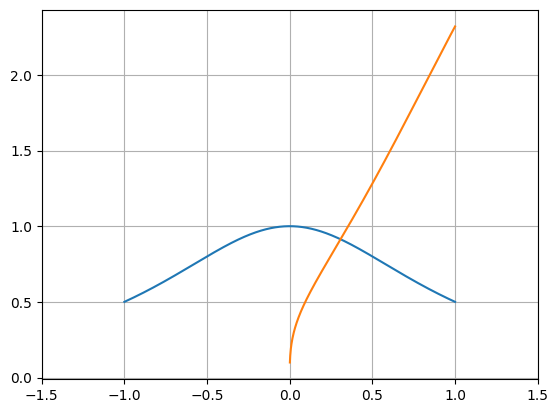

In [11]:
x_3a = np.linspace(-1.0, 1.0, 1024)
x_3b = np.linspace(-1.0, 1.0, 1024)
# y_3a = [f_3a(x_3a[i]) for i in range(len(x_3a))]
# y[1] = [abs(y[1][i]) for i in range(len(y[1]))]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(left=-1.5, right=1.5)
plt.grid(True)
plt.plot(x_3a, f_3a(x_3a), x_3b, f_3b(x_3b))
plt.show()